# Création de Modèles - MLP

Groupe 10 : Aleandre Ly, Ismail Naziz, Paul Paquin, Charlène Petit

*Ce Notebook a pour but de mettre en place des premiers modèles pour aider à la classification binaire des joueurs pour un cluster de club (1 = recommandé, 0 = non recommandé)* 
- Ce Notebook produit un modèle et renvoit une liste de 0 et de 1
- Ce Notebook prend en entrée la table concaténée de Performance/Désirabilité/Transferts

# Imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import classification_report

# I - Preparation des données

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [11]:
df= pd.read_csv('Labelised_special_17_18.csv')
df=df[df['Performance']<=60]
df=df[df['Performance']>=10]
df

,Unnamed: 0,Equipe,Age,Position 1,VM,000,100,101,110,111,...,Allant à,Name,label 000,label 100,label 101,label 110,label 111,label 001,label 010,label 011
0,0,AC Milan,0.130435,MFC,50000.0,52.084574,74.205775,79.831912,34.502522,47.871807,...,NaN,Emanuele Torrasi,1,1,1,1,1,1,1,0
1,1,AC Milan,0.695652,DMC,20000000.0,42.652218,69.217421,77.207300,41.365161,57.378609,...,NaN,Lucas Biglia,0,0,0,1,0,0,1,1
2,2,AC Milan,0.652174,DC,45000000.0,48.898795,72.647890,51.033987,61.623865,51.214983,...,Juventus,Leonardo Bonucci,0,0,0,0,0,0,0,0
3,3,AC Milan,0.739130,MFC,3500000.0,36.464490,65.846273,75.466815,45.787305,63.513518,...,NaN,Riccardo Montolivo,1,1,1,0,1,1,1,0
4,4,AC Milan,0.608696,FW,20000000.0,54.799202,37.184064,45.191345,32.594654,45.220277,...,Atletico Madrid,Nikola Kalinic,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,2069,Wolfsburg,0.434783,MFLR,3000000.0,78.975066,45.916795,21.079088,15.100778,20.977107,...,NaN,Renato Steffen,0,0,0,0,0,0,0,0
2070,2070,Wolfsburg,0.391304,AMC,10000000.0,85.109562,12.317767,14.933080,10.690819,14.861740,...,NaN,Yunus Malli,0,0,0,0,0,0,0,0
2071,2071,Wolfsburg,0.391304,DC,10000000.0,85.109562,91.936676,14.933080,88.880488,14.861740,...,Schalke 04,Jeffrey Bruma,0,0,0,0,0,0,0,0
2072,2072,Wolfsburg,0.173913,FW,6500000.0,67.678026,26.663463,32.353602,23.261377,32.286694,...,NaN,Landry Dimata,0,0,0,0,0,0,0,0


In [22]:
data=df[['100','Performance', 'label 100']]
data=clean_dataset(data)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# II - Représentation graphique des Métriques pour un cluster

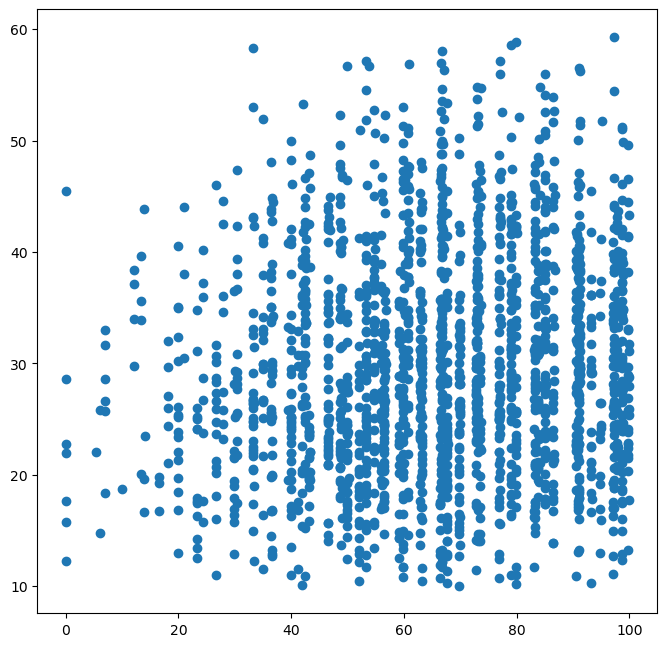

In [23]:
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(df['000'],df['Performance'])

In [24]:
X = data[['100','Performance']]
y = data['label 100']
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=27)


# III - Recherche des meilleurs paramètres pour le MLP

In [25]:
mlp = MLPClassifier(hidden_layer_sizes=(256, 256,256), max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,batch_size=64,
                    learning_rate_init=0.0001)
mlp.fit(x_train, y_train)
mlp.score(x_test,y_test)

Iteration 1, loss = 0.91224774
Iteration 2, loss = 0.50462227
Iteration 3, loss = 0.50475517
Iteration 4, loss = 0.50205984
Iteration 5, loss = 0.49708833
Iteration 6, loss = 0.49778231
Iteration 7, loss = 0.50126729
Iteration 8, loss = 0.49903492
Iteration 9, loss = 0.49582866
Iteration 10, loss = 0.50269345
Iteration 11, loss = 0.52797696
Iteration 12, loss = 0.50262547
Iteration 13, loss = 0.49553940
Iteration 14, loss = 0.49534932
Iteration 15, loss = 0.49608430
Iteration 16, loss = 0.50406197
Iteration 17, loss = 0.49705507
Iteration 18, loss = 0.49578863
Iteration 19, loss = 0.49643785
Iteration 20, loss = 0.49945463
Iteration 21, loss = 0.49638340
Iteration 22, loss = 0.56325564
Iteration 23, loss = 0.49929823
Iteration 24, loss = 0.49996075
Iteration 25, loss = 0.49983042
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


0.7535641547861507

In [26]:
y_pred=mlp.predict(x_test)
conf = confusion_matrix(y_test, y_pred,labels=[0, 1])
conf


array([[355,  25],
       [ 96,  15]])

In [28]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

# Prediction sur 2018-2019

In [29]:
data_player_18_19 = pd.read_csv("Final_table_special_18_19.csv",sep=",", engine="python",encoding = 'UTF-8')
data_player_18_19=data_player_18_19[data_player_18_19['Performance']<=60]
data_player_18_19=data_player_18_19[data_player_18_19['Performance']>=10]

In [30]:
data=data_player_18_19[['100','Performance']]
data=clean_dataset(data)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
X = data[['100','Performance']]

In [34]:
prediction=mlp.predict(X)

In [37]:
prediction

array([0., 0., 0., ..., 0., 0., 0.])